In [ ]:
# Basic Classification Methods

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"K-nearest neighbor Accuracy: {knn_accuracy * 100: .2f}%")
print(f"Logistic Regression Accuracy: {logreg_accuracy * 100: .2f}%")

K-nearest neighbor Accuracy:  91.11%
Logistic Regression Accuracy:  95.56%


In [7]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_logreg = logreg.predict(X_test)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

class_report_logreg = classification_report(y_test, y_pred_logreg, target_names = iris.target_names)

print("Confusion matrix for Logistic regression:\n", conf_matrix_logreg)
print("Classification report for Logistic Regression:\n", class_report_logreg)

Confusion matrix for Logistic regression:
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
Classification report for Logistic Regression:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
# Clustering Techniques

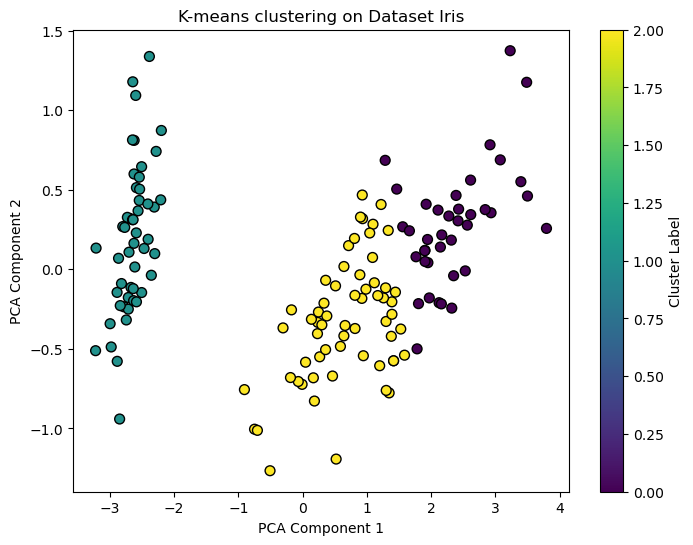

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels, cmap = 'viridis', marker = "o", edgecolor = "k", s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("K-means clustering on Dataset Iris")
plt.colorbar(label = "Cluster Label")
plt.show()

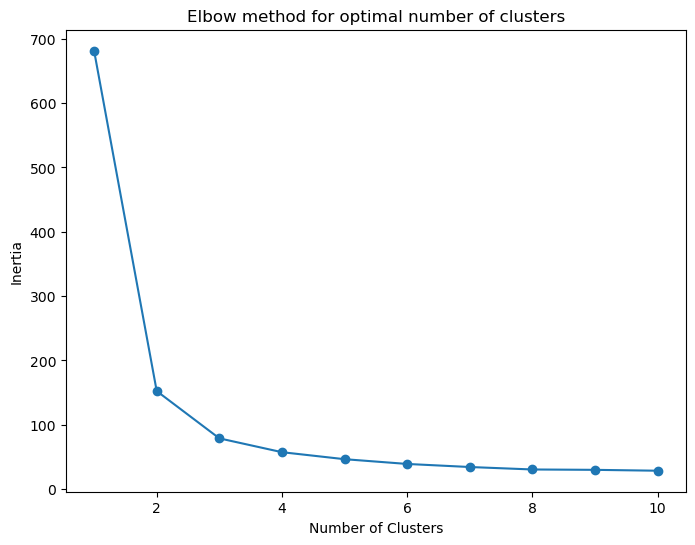

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

inertia_values = []
cluster_range = range (1,11)

for k in cluster_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize = (8, 6))
plt.plot(cluster_range, inertia_values, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal number of clusters')
plt.show()

In [ ]:
# Introduction to Advanced Clustering Techniques

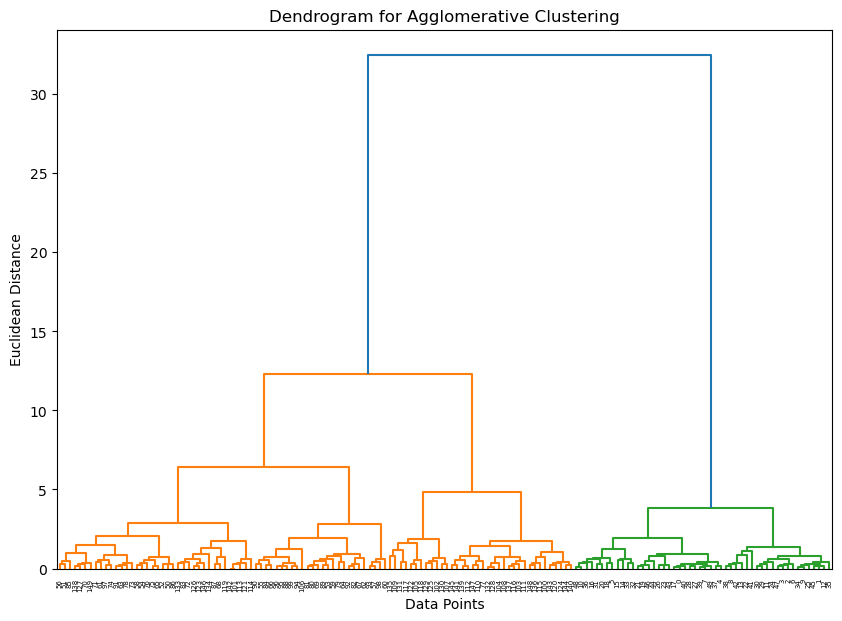

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X)

plt.figure(figsize=(10, 7))
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

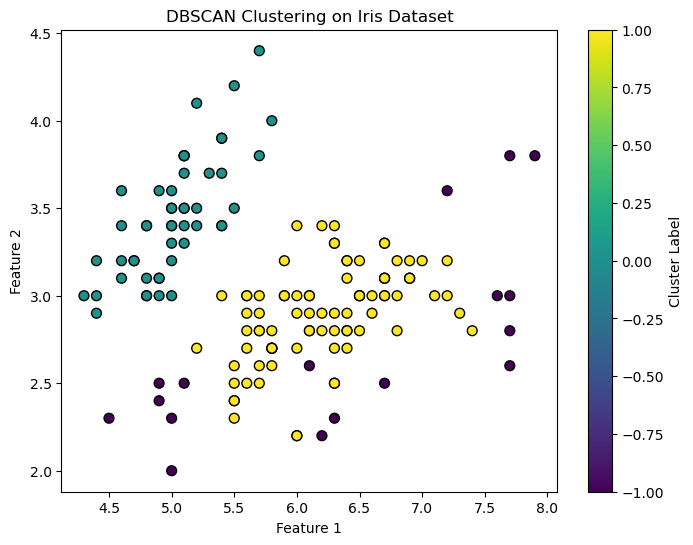

In [29]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering on Iris Dataset")
plt.colorbar(label='Cluster Label')
plt.show()